# 2019년 12월 4일 

https://www.tensorflow.org/tutorials/keras/save_and_load

In [1]:
import os

import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.0.0'

In [10]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels
test_labels = test_labels

# 일반적인 기계학습 (2차원 - 행, 열 )
train_images = train_images.reshape(-1, 28 * 28) / 255.0
test_images = test_images.reshape(-1, 28 * 28) / 255.0

### 모델 정의 
가중치를 저장하고 불러오는 예제를 위해 간단한 모델 

In [11]:
# 간단한 Sequential 모델을 반환합니다
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                # 원핫 인코딩 안해서 sparse_
                metrics=['accuracy'])

  return model


# 모델 객체를 만듭니다
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Checkpoint 

In [13]:
tf.keras.callbacks.ModelCheckpoint
# save_best_only: True (가장 좋은 하이퍼파라미터일때 불러들일 수 있다.)
# ModelCheckpoint는 시행착오용으로 쓴다.

tensorflow.python.keras.callbacks.ModelCheckpoint

In [15]:
tf.keras.callbacks.EarlyStopping

tensorflow.python.keras.callbacks.EarlyStopping

- 파일 종류 
text(눈으로 볼 수 있음), binary(눈으로 볼 수 없음)

In [25]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [12]:
# 체크포인트 콜백 만들기 - 잘못되면 되돌아 갈 수 있는 것 
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

model.fit(train_images, train_labels,  epochs = 2,
          validation_data = (test_images,test_labels),
          callbacks = [cp_callback])  # 훈련 단계에 콜백을 전달합니다

# 옵티마이저의 상태를 저장하는 것과 관련되a어 경고가 발생할 수 있습니다.
# 이 경고는 (그리고 이 노트북의 다른 비슷한 경고는) 이전 사용 방식을 권장하지 않기 위함이며 무시해도 좋습니다.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.2143 - accuracy: 0.9344 ETA: 0s - loss: 0.2152 - accuracy: 0.93 - ETA: 0s - loss: 0.2149 - accura
Epoch 00001: saving model to training_1/cp.ckpt
60000/60000 [==============================] - 38s 638us/sample - loss: 0.2143 - accuracy: 0.9344 - val_loss: 0.1012 - val_accuracy: 0.9658
Epoch 2/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.1053 - accuracy: 0.9675 ETA: 0s - loss: 0.1053 - accuracy: 
Epoch 00002: saving model to training_1/cp.ckpt
60000/60000 [==============================] - 40s 662us/sample - loss: 0.1053 - accuracy: 0.9675 - val_loss: 0.0853 - val_accuracy: 0.9732
Epoch 3/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0795 - accuracy: 0.9751
Epoch 00003: saving model to training_1/cp.ckpt
60000/60000 [==============================] - 39s 653us/sample - loss: 0.0796 - accuracy: 0.9751 - val_loss: 0.0751

In [27]:
model = create_model()

loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("훈련되지 않은 모델의 정확도: {:5.2f}%".format(100*acc))

10000/1 - 2s - loss: 2.3628 - accuracy: 0.0975
훈련되지 않은 모델의 정확도:  9.75%


In [26]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

10000/1 - 2s - loss: 0.0376 - accuracy: 0.9823
복원된 모델의 정확도: 98.23%


In [17]:
# 파일 이름에 에포크 번호를 포함시킵니다(`str.format` 포맷)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    # period: 한 번째 에포크마다 가중치를 저장합니다
    period=1)
# period를 굳이 쓸 필요는 없다. (test용으로 쓰기 때문에 필요없다.)
# save_best_model를 쓰는게 훨씬 낫다.

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))
model.fit(train_images, train_labels,
          epochs = 2, callbacks = [cp_callback],
          validation_data = (test_images,test_labels),
          verbose=0)

W1204 14:27:34.802543 21096 callbacks.py:863] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.



Epoch 00001: saving model to training_2/cp-0001.ckpt

Epoch 00002: saving model to training_2/cp-0002.ckpt


In [20]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2\\cp-0002.ckpt'

In [21]:
# keras 버전에서만 불러들일 수 있다. 
# keras checkpoint는 테스트용이다. 
model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

10000/1 - 2s - loss: 0.0538 - accuracy: 0.9711
복원된 모델의 정확도: 97.11%


https://github.com/ysh329/deep-learning-model-convertor

외부 파일을 이용해서 다른 모델에서도 쓸 수 있긴하다. 

### 모델 전체를 저장하기 
- HDF5 파일로 저장하기 

In [28]:
!pip install -q h5py pyyaml
# 데이터를 관리하기 위해서 많이 썼다. 
# hierarchy: 계층적으로 

In [29]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

# 전체 모델을 HDF5 파일로 저장합니다
model.save('my_model.h5')
# model checkpoint 
# 이건 최종 모델만 저장할 수 있다. 

Train on 60000 samples
Epoch 1/5


W1204 14:40:36.599096 21096 util.py:144] Unresolved object in checkpoint: (root).optimizer.iter
W1204 14:40:36.600096 21096 util.py:144] Unresolved object in checkpoint: (root).optimizer.beta_1
W1204 14:40:36.601093 21096 util.py:144] Unresolved object in checkpoint: (root).optimizer.beta_2
W1204 14:40:36.602094 21096 util.py:144] Unresolved object in checkpoint: (root).optimizer.decay
W1204 14:40:36.603094 21096 util.py:144] Unresolved object in checkpoint: (root).optimizer.learning_rate
W1204 14:40:36.604093 21096 util.py:152] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/checkpoints#loading_mechanics for details.


60000/60000 [==============================] - 34s 568us/sample - loss: 0.2153 - accuracy: 0.9335
Epoch 2/5
60000/60000 [==============================] - 35s 591us/sample - loss: 0.1066 - accuracy: 0.9672
Epoch 3/5
60000/60000 [==============================] - 38s 638us/sample - loss: 0.0801 - accuracy: 0.9746
Epoch 4/5
60000/60000 [==============================] - 36s 600us/sample - loss: 0.0686 - accuracy: 0.9790- loss: 0.0683 - accuracy:  - ETA: 0s - loss: 0.0684 - 
Epoch 5/5
60000/60000 [==============================] - 38s 638us/sample - loss: 0.0589 - accuracy: 0.9811


### save_weights 

In [ ]:
# 수동으로 가중치 저장하기 

# 가중치를 저장합니다
model.save_weights('./checkpoints/my_checkpoint')

# 가중치를 복원합니다
model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

In [37]:
model.save_weights('./checkpoints/my_checkpoint', save_format='h5') # tf

check point 저장 방식 
- tensorflow: keras에서 충돌날 수 있다. 
- hdf5: 이 방식을 쓰는게 가장 좋다. 

In [31]:
import keras 
# keras/tensorflow 는 혼용해서 쓰면 안된다. 

Using TensorFlow backend.


In [35]:
nn = tf.keras.models.Sequential()

In [36]:
nn.save_weights
# hdf5로 저장할 수 있다.

<bound method Network.save_weights of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000203782D7588>>

In [1]:
from sklearn.datasets import load_iris

In [2]:
from sklearn.neural_network import MLPClassifier

In [16]:
data = load_iris()

In [3]:
mlp = MLPClassifier()

In [ ]:
mlp.fit()

In [8]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [18]:
KerasClassifier
# Encapsulation 

tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier

In [22]:
def create_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(4,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer='adam',metrics=['accuracy'] 
                 )
    return model

In [23]:
mlp_k = KerasClassifier(create_model)

In [24]:
mlp_k.fit(data.data, data.target, epochs=5)

Train on 150 samples
Epoch 1/5
150/150 [==============================] - 0s 3ms/sample - loss: 1.2243 - accuracy: 0.3133
Epoch 2/5
150/150 [==============================] - 0s 127us/sample - loss: 1.0293 - accuracy: 0.3933
Epoch 3/5
150/150 [==============================] - 0s 87us/sample - loss: 0.9274 - accuracy: 0.6267
Epoch 4/5
150/150 [==============================] - 0s 93us/sample - loss: 0.8402 - accuracy: 0.6667
Epoch 5/5
150/150 [==============================] - 0s 93us/sample - loss: 0.7647 - accuracy: 0.7133


- cross_val_score
- gridSearchcv
- pipeline
등 다 쓸 수 있다.

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(KerasClassifier(create_model,epochs=5), data.data, data.target, cv=10)

Train on 135 samples
Epoch 1/5
135/135 [==============================] - 0s 4ms/sample - loss: 1.1989 - accuracy: 0.3481
Epoch 2/5
135/135 [==============================] - 0s 133us/sample - loss: 0.9120 - accuracy: 0.6593
Epoch 3/5
135/135 [==============================] - 0s 111us/sample - loss: 0.8614 - accuracy: 0.6593
Epoch 4/5
135/135 [==============================] - 0s 104us/sample - loss: 0.7843 - accuracy: 0.7852
Epoch 5/5
15/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 17ms/sample - loss: 0.4784 - accuracy: 1.0000
Train on 135 samples
Epoch 1/5
135/135 [==========

Train on 135 samples
Epoch 1/5
135/135 [==============================] - 1s 4ms/sample - loss: 1.2818 - accuracy: 0.3704
Epoch 2/5
135/135 [==============================] - 0s 111us/sample - loss: 1.0569 - accuracy: 0.6296
Epoch 3/5
135/135 [==============================] - 0s 104us/sample - loss: 0.9171 - accuracy: 0.7556
Epoch 4/5
135/135 [==============================] - 0s 148us/sample - loss: 0.8269 - accuracy: 0.7407
Epoch 5/5
15/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 11ms/sample - loss: 0.9558 - accuracy: 0.0000e+00
Train on 135 samples
Epoch 1/5
135/135 [======

array([1.        , 0.73333335, 1.        , 0.33333334, 0.        ,
       0.        , 1.        , 0.86666667, 0.        , 0.13333334])

In [27]:
from sklearn.model_selection import learning_curve

In [29]:
train_size, train_score, test_score = learning_curve(KerasClassifier(create_model,epochs=5), data.data, data.target, cv=5)

Train on 12 samples
Epoch 1/5
12/12 [==============================] - 0s 40ms/sample - loss: 1.0920 - accuracy: 1.0000
Epoch 2/5
12/12 [==============================] - 0s 333us/sample - loss: 0.9709 - accuracy: 1.0000
Epoch 3/5
12/12 [==============================] - 0s 333us/sample - loss: 0.8557 - accuracy: 1.0000
Epoch 4/5
12/12 [==============================] - 0s 333us/sample - loss: 0.7484 - accuracy: 1.0000
Epoch 5/5
12/1 [========================================================================================================================================================================================================================================================================================================================================================================] - 0s 583us/sample - loss: 0.5604 - accuracy: 1.0000
Train on 39 samples
Epoch 1/5
39/39 [==============================] - 1s 19ms/sample - loss: 1.8458 - accuracy: 0.0000e+00
Epoch 2/5
39/39 [======

Train on 12 samples
Epoch 1/5
12/12 [==============================] - 1s 43ms/sample - loss: 1.6297 - accuracy: 0.0000e+00
Epoch 2/5
12/12 [==============================] - 0s 333us/sample - loss: 1.5217 - accuracy: 0.0000e+00
Epoch 3/5
12/12 [==============================] - 0s 333us/sample - loss: 1.4212 - accuracy: 0.0000e+00
Epoch 4/5
12/12 [==============================] - 0s 250us/sample - loss: 1.3254 - accuracy: 0.0000e+00
Epoch 5/5
12/1 [========================================================================================================================================================================================================================================================================================================================================================================] - 0s 500us/sample - loss: 1.1488 - accuracy: 1.0000
Train on 39 samples
Epoch 1/5
39/39 [==============================] - 1s 19ms/sample - loss: 1.5860 - accuracy: 0.2308
Epoch 2/5
3

Train on 12 samples
Epoch 1/5
12/12 [==============================] - 1s 55ms/sample - loss: 1.3352 - accuracy: 0.0000e+00
Epoch 2/5
12/12 [==============================] - 0s 417us/sample - loss: 1.2099 - accuracy: 0.0000e+00
Epoch 3/5
12/12 [==============================] - 0s 500us/sample - loss: 1.0953 - accuracy: 1.0000
Epoch 4/5
12/12 [==============================] - 0s 416us/sample - loss: 0.9885 - accuracy: 1.0000
Epoch 5/5
12/1 [========================================================================================================================================================================================================================================================================================================================================================================] - 0s 416us/sample - loss: 0.8059 - accuracy: 1.0000
Train on 39 samples
Epoch 1/5
39/39 [==============================] - 1s 15ms/sample - loss: 1.4156 - accuracy: 0.0000e+00
Epoch 2/5
39/39

Train on 12 samples
Epoch 1/5
12/12 [==============================] - 1s 52ms/sample - loss: 2.0813 - accuracy: 0.0000e+00
Epoch 2/5
12/12 [==============================] - 0s 500us/sample - loss: 1.8560 - accuracy: 0.0000e+00
Epoch 3/5
12/12 [==============================] - 0s 500us/sample - loss: 1.6407 - accuracy: 0.0000e+00
Epoch 4/5
12/12 [==============================] - 0s 583us/sample - loss: 1.4379 - accuracy: 0.0000e+00
Epoch 5/5
12/1 [========================================================================================================================================================================================================================================================================================================================================================================] - 0s 500us/sample - loss: 1.0796 - accuracy: 0.3333
Train on 39 samples
Epoch 1/5
39/39 [==============================] - 1s 16ms/sample - loss: 0.8224 - accuracy: 1.0000
Epoch 2/5
3

93/93 [==============================] - 1s 7ms/sample - loss: 1.3481 - accuracy: 0.0000e+00
Epoch 2/5
93/93 [==============================] - 0s 204us/sample - loss: 1.1162 - accuracy: 0.4194
Epoch 3/5
93/93 [==============================] - 0s 150us/sample - loss: 0.9628 - accuracy: 0.4301
Epoch 4/5
93/93 [==============================] - 0s 161us/sample - loss: 0.8573 - accuracy: 0.4839
Epoch 5/5
30/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 12 samples
Epoch 1/5
12/12 [==============================] - 1s 50ms/sample - loss: 1.7750 - accuracy: 0.0000e+00
Epoch 2/5
12/12 [==============================] - 0s 417us/sample - loss: 1.6005 - accuracy: 0.0000e+00
Epoch 3/5
12/12 [==============================] - 0s 583us/sample - loss: 1.4390 - accuracy: 0.0000e+00
Epoch 4/5
12/12 [==============================] - 0s 583us/sample - loss: 1.2882 - accuracy: 0.0000e+00
Epoch 5/5
12/1 [========================================================================================================================================================================================================================================================================================================================================================================] - 0s 416us/sample - loss: 1.0196 - accuracy: 0.0000e+00
Train on 39 samples
Epoch 1/5
39/39 [==============================] - 1s 22ms/sample - loss: 1.9843 - accuracy: 0.0000e+00
Epo

93/93 [==============================] - 1s 7ms/sample - loss: 3.1136 - accuracy: 0.0000e+00
Epoch 2/5
93/93 [==============================] - 0s 236us/sample - loss: 2.3884 - accuracy: 0.0000e+00
Epoch 3/5
93/93 [==============================] - 0s 204us/sample - loss: 1.8268 - accuracy: 0.0000e+00
Epoch 4/5
93/93 [==============================] - 0s 150us/sample - loss: 1.4318 - accuracy: 0.2903
Epoch 5/5
30/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [34]:
import sklearn_evaluation

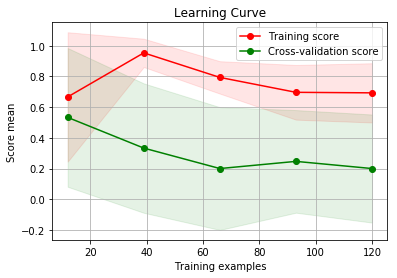

In [35]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

요동치는 것은 데이터수가 부족하다는 것 

learning curve 

In [39]:
from sklearn.pipeline import Pipeline

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
std = StandardScaler()

In [50]:
pipe = Pipeline([('scaler', StandardScaler()), ('keras', KerasClassifier(create_model,epochs=5))])

In [51]:
pipe.fit(data.data, data.target)

Train on 150 samples
Epoch 1/5
150/150 [==============================] - 1s 3ms/sample - loss: 1.3315 - accuracy: 0.4200
Epoch 2/5
150/150 [==============================] - 0s 120us/sample - loss: 1.1513 - accuracy: 0.6667
Epoch 3/5
150/150 [==============================] - 0s 93us/sample - loss: 0.9919 - accuracy: 0.7800
Epoch 4/5
150/150 [==============================] - 0s 93us/sample - loss: 0.8625 - accuracy: 0.7867
Epoch 5/5
150/150 [==============================] - 0s 100us/sample - loss: 0.7558 - accuracy: 0.7933


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('keras',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E6B2B3F940>)],
         verbose=False)

### keras & scikit 연동하기 

재활용할 때 좋다

In [52]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


기계학습: 자기가 룰 찾아내는 것 (사람의 시행착오) 

###  Convolution Neural Network
- https://www.tensorflow.org/tutorials/images/cnn
- 합성공 신경망 

- depth가 필요하므로 다 3차원으로 집어넣는다. 

- nlp, 신호처리에도 쓰였다. 그 때는 1차원(Conv1D)

특징 찾아내는 컨볼루션 
- python: conv-forword 
- tensorflow: tf.nn.conv2d 
- keras: Conv2D

vertical filter 
sobel filter (1 ,2 ,1 ,0 ,0, 0, -1, -2, -1)
scharr filter (3, 10, 3, 0, 0, 0 , -3, -10 , -3) 

In [53]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [54]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# cnn 은 depth를 하나 더 만들어줘서 3차원으로 만든다. 
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [55]:
model = models.Sequential()
# 3차원임으로 input_shape=(28,28,1)이다. 
# 32개의 특성을 (3,3) 커널 형태
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# 가장 큰 값 뽑는 것 (특성을 줄였다.)
# maxpooling은 속도도 빨라지고, overfitting도 방지해준다. 
# 컴퓨터 성능이 좋으면 안해줘도 되긴 한다. (특성값을 잃는 것이므로)
model.add(layers.MaxPooling2D((2, 2)))
# 64개의 특성으로 (3,3)
# relu를 쓰는 이유는 얘도 학습을 할 것이기 때문이다. 
# relu쓰는 이유는 overfitting 막기 위해서 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [57]:
model.summary()

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [58]:
# 전통적인 머신러닝 방법 - 1차원 (flatten)
# 특징을 학습한다. 
model.add(layers.Flatten())
# 64로 하는 이유는 Conv2D 64로 끝났기 때문이다? 아니다.
# 32로 바궈서 dense를 돌려도 돌아간다. 
# maxpooling 안하고 dense 안맞춰도 학습이 된다. 
# 사실상 성능이 크게 달라지지 않는다. 
# maxpooling은 속도도 빨라지고, overfitting도 방지해준다. 
model.add(layers.Dense(64, activation='relu'))
# kernel_regularizer (l1 (|x|+|y|), l2 (x**2+y**2))
model.add(layers.Dense(10, activation='softmax'))

In [59]:
model.summary()

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_270 (Dense)            (None, 64)              

In [60]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 127s 2ms/sample - loss: 0.1477 - accuracy: 0.9537
Epoch 2/5
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.0472 - accuracy: 0.9853
Epoch 3/5
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.0342 - accuracy: 0.9891
Epoch 4/5
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.0249 - accuracy: 0.9922
Epoch 5/5
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.0204 - accuracy: 0.9936


In [61]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/1 - 5s - loss: 0.0167 - accuracy: 0.9908


In [62]:
print(test_acc)

0.9908


In [ ]:
roc 
- x축: data 
- y축: 성능

- No Free Lunch 

성능이 좋지만, 과적합되기가 쉽다. 
- layer
- node
- epoch

**[overfitting 막는 법]**

**layers 에서 패널티를 줘서 과적합을 막을 수 있다.**
- penalty, regularizer
- l1
- l2 
- l1 & l2 두개를 쓸 수도 있다.

kernel_regularizer (l1 (|x|+|y|), l2 (x**2+y**2))

**cross_validation**
- 확인하는 용도로 쓴다. 
- 데이터가 작을 때-차원의 저주로 오버피팅이 더 잘 난다. 
- 하지만 시간이 오래 걸리고, 비용이 많이 나오는 단점이 있다. 

**dropout** 
layer 뒤에 추가 가능.
activation 뒤에 추가 가능.
0.2 (20%)를 랜덤으로 빼버린다는 것.
학습속도가 느리다. 

matplotlib에서 (state machine) - 앞에 있는 가장 가까운거 붙어서 하는 것 -> tf.keras.layers.Dropout(0.2) (앞에 Dense 붙어서 실행)

**Early stopping**

**Ensemble**
- bagging <br>
random boostrap 방법으로 샘플을 여러 번 뽑아 각 모델을 학습시켜 결과를 집계하는 방식이다.
- boosting <br>
성능 안좋은 것에 가중치줘서 학습시키는 것 
- stacking <br>
A 알고리즘, B 알고리즘, C 알고리즘을 또 학습시켜서 나온결과로 또 학습시키는 것이다. 하지만 단점으로 시간, 비용이 많이 필요하다. 


- 데이터를 늘린다. 
- 모델을 간단히 한다. 

- Padding 
유효 합성곱(Valid convolutions): 패딩이 없는것 
동일 합성곱(Same convolutions): 패딩을 한 뒤 결과 이미지의 크기가 기존 이미지와 동일
p = (f-1)/2 

# 2019년 12월 5일

1. train slow

2. better performance 

overfitting 과 underfitting을 보려면 learning curve 그래프를 확인해야한다. 

[LOC] 
x: epoch or data(keras 자체로는 그리기 힘들다, 따라서 sklearn이용해서 그린다.)

y: loss(작을수록 좋다.) or 정확도(클수록 좋다.) 


- underfitting: 모델을 다시 만드는게 좋다. 
- overfitting: validation이 학습될수록 올라간다. 
    - 데이터를 늘린다. 
    - 모델을 간단히 한다. 
    - feature selection (차원 축소) 
    - deeplearning: layer, node 줄인다. (dropout)


성능이 비슷하면 '오컴의 면도날'로 간단한 모델을 선택한다. 

## keras/tensor

서로 연동이 안된다. 따라서 tf.keras 가져와야한다. 

In [1]:
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

In [2]:
# 함수로 만들어서 넘기는 것이 좋다. 
batch_size = 32
epochs = 1
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
import matplotlib.pyplot as plt 

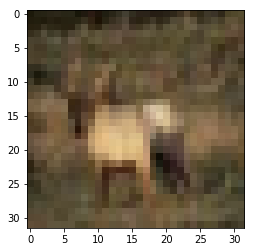

In [5]:
plt.imshow(x_train[3])

In [6]:
from tensorflow import keras

In [7]:
from tensorflow.keras.utils import to_categorical
# sparse 빼고 쓸때 to_categorial 를 쓴다. 

In [8]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

- ImageDataGenerator (numpy -> tensor로 바꿔준다.)  
- Image

In [9]:
# tensorflow.keras는 float32가 기본 데이터 타입이다. 
# (opencv도 내부적으로 float32인데, opencv는 float32만 된다.)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
x_train.shape
# 3차원이면 너무 느려서 색상을 날려서 사용하기도 한다. 

(50000, 32, 32, 3)

- Padding 

유효 합성곱(Valid convolutions): 패딩이 없는것 (stride 때문에 못갈 경우 멈추도록 도와주는 것)

동일 합성곱(Same convolutions): 패딩을 한 뒤 결과 이미지의 크기가 기존 이미지와 동일 (strdie 때문에 못갈경우 뒤에 패딩을 추가) 

p = (f-1)/2 

In [11]:
# correlation : 반전 안시키는 것
# convolution : flip 해서 반전시키고 학습시키는 것 
# 하지만 둘이 영상에서는 차이가 없어서 그냥 반전안시키고 cnn 쓴다. 
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same',
                input_shape=x_train.shape[1:]))
model.add(Activation('relu')) # relu안쓰면 과적합이 일어난다. 
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
# 요즘에 잘 안쓴다. (Stride로 대체시킨다.)
# 처음 논문에서 maxpooling 쓰고 다음 모델에서 안쓰고 했기 때문에 이렇게 쓴다. 
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# 0보다 작은걸 (1/100)x : leaky relu

In [12]:
model.add(Conv2D(64, (3, 3), padding='same'))
# relu를 sigmoid로 바꿨을 때 loss가 변하지 않는다. 
# loss값이 업데이트가 안될 경우 학습이 잘 안되는 것이다. 
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

In [13]:
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [14]:
# 남에것 갖다가 쓰는것 
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [15]:
# to_categorial: sparse 필요 없다.
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
# neural_network
# 객체를 보통 가져온다. 
tf.nn.relu

<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>

In [17]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
38592/50000 [======================>.......] - ETA: 1:54 - loss: 2.3171 - accuracy: 0.0989

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
# load_image: PIL -> image.to_array()

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

In [39]:
vars(datagen)

{'featurewise_center': False,
 'samplewise_center': False,
 'featurewise_std_normalization': False,
 'samplewise_std_normalization': False,
 'zca_whitening': False,
 'zca_epsilon': 1e-06,
 'rotation_range': 0,
 'width_shift_range': 0.1,
 'height_shift_range': 0.1,
 'shear_range': 0.0,
 'zoom_range': [1.0, 1.0],
 'channel_shift_range': 0.0,
 'fill_mode': 'nearest',
 'cval': 0.0,
 'horizontal_flip': True,
 'vertical_flip': False,
 'rescale': None,
 'preprocessing_function': None,
 'dtype': 'float32',
 'interpolation_order': 1,
 'data_format': 'channels_last',
 'channel_axis': 3,
 'row_axis': 1,
 'col_axis': 2,
 '_validation_split': 0.0,
 'mean': None,
 'std': None,
 'principal_components': None,
 'brightness_range': None}

In [40]:
# 특정기능은 fit을 해줘야 실행되기 때문에 필요한 것이다. 
# zca_whitening 같은 옵션은 fit을 해줘야 실행된다.
datagen.fit(x_train)

MemoryError: Unable to allocate array with shape (50000, 32, 32, 3) and data type float32

In [41]:
vars(datagen)

{'featurewise_center': False,
 'samplewise_center': False,
 'featurewise_std_normalization': False,
 'samplewise_std_normalization': False,
 'zca_whitening': False,
 'zca_epsilon': 1e-06,
 'rotation_range': 0,
 'width_shift_range': 0.1,
 'height_shift_range': 0.1,
 'shear_range': 0.0,
 'zoom_range': [1.0, 1.0],
 'channel_shift_range': 0.0,
 'fill_mode': 'nearest',
 'cval': 0.0,
 'horizontal_flip': True,
 'vertical_flip': False,
 'rescale': None,
 'preprocessing_function': None,
 'dtype': 'float32',
 'interpolation_order': 1,
 'data_format': 'channels_last',
 'channel_axis': 3,
 'row_axis': 1,
 'col_axis': 2,
 '_validation_split': 0.0,
 'mean': None,
 'std': None,
 'principal_components': None,
 'brightness_range': None}

In [42]:
dir(datagen)
# next가 없으므로 이건 generator가 아니다. 
# flow를 해야지만 generator로 바꿀 수 있다. 

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_validation_split',
 'apply_transform',
 'brightness_range',
 'channel_axis',
 'channel_shift_range',
 'col_axis',
 'cval',
 'data_format',
 'dtype',
 'featurewise_center',
 'featurewise_std_normalization',
 'fill_mode',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'height_shift_range',
 'horizontal_flip',
 'interpolation_order',
 'mean',
 'preprocessing_function',
 'principal_components',
 'random_transform',
 'rescale',
 'rotation_range',
 'row_axis',
 'samplewise_center',
 'samplewise_std_normalization',
 'shear_range',
 'standa

In [43]:
dir(datagen.flow(x_train,y_train))
# generator가 된다. 

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'batch_index',
 'batch_size',
 'data_format',
 'dtype',
 'image_data_generator',
 'index_array',
 'index_generator',
 'lock',
 'n',
 'next',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'seed',
 'shuffle',
 'total_batches_seen',
 'white_list_formats',
 'x',
 'x_misc',
 'y']

In [44]:
# flow: generator로 만들어준다. 
# ImageDataGenerator.flow_from_dataframe
# datagen.flow_from_directory 
# datagen.flow
# Imagedata.fit_generator() : Next가 되기 때문에 generator를 써야한다. 

In [45]:
model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs, # epoch 당 generator 몇개 보낼지
                        validation_data=(x_test, y_test))

# workers = n_jobs: 동시에 4개 실행 (일하는 놈: 4놈)
# 전처리까지 하기 때문에 속도가 훨씬 느리다. 

 130/1563 [=>............................] - ETA: 10:59 - loss: 2.4090 - accuracy: 0.0971

KeyboardInterrupt: 

이미지 데이터 제너레이터는 옵션을 관할하고
flow가 제너레이터로 바꿔준다. 
flow로 바꿔주고, fit_generator로 학습시킨다.
이미지데이터제너레이터는 fit_generator를 써야한다. 

- 하나 만들어 놓으면 다른 애들 추가시키고, 차후 변경시킬 때 편하다. 

cnn은 성능이 좋은 반면 느리다. 
1. train slow 
2. better performance 

In [ ]:
# Save model and weights
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

### Tensorflow board

load_ext tensorboard

In [20]:
%load_ext tensorboard

In [21]:
# 현재 %로 쓸 수 있는 애들 
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %tensorboard  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%p

In [ ]:
%tensorboard

In [1]:
2 + 5 + 5

12

In [22]:
11

11